# Machine Learning - Regressão Logística - Predicting Clicks on Ad
Neste projeto estarei trabalhando com um conjunto de dados de publicidade baixado do Kaggle, indicando se um usuário de internet específico clicou ou não em uma propaganda. Irei tentar criar um modelo que preveja se clicará ou não em um anúncio baseado nos recursos desse usuário

Este conjunto de dados contém os seguintes recursos: 
- 'Daily Time Spent on site': Tempo no site em minutos
- 'Age': Idade do consumidor
- 'Area Income': Média da renda do consumidor na região
- 'Daily Internet Usage': Média em minutos por dia que o consumidor está na internet
- 'Ad Topic Line': Título do anúncio
- 'City': Cidade do consumidor
- 'Male': Se o consumidor era ou não do sexo Masculino
- 'Timestamp': Hora em que o consumidor clicou no anúncio ou fechou a janela
- 'Clicked on Ad': 0 ou 1 indicam se clicou ou não no anúncio

### Importando as bibliotecas 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")

%matplotlib inline

### Lendo o arquivo de dados e definindo como Df

In [5]:
df = pd.read_csv('Advertising.csv')

### Verificando o cabeçalho com o método .head() e dando uma olhada nos dados

In [6]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


### Verificando as informações do Data Frame

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [8]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


### Verificando a existência de Valores Nulos

In [10]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

# Análise exploratória dos Dados 

 ### Irei usar o Seaborn para explorar os dados

### Criando um histograma de 'Age'

<AxesSubplot:xlabel='Age', ylabel='Density'>

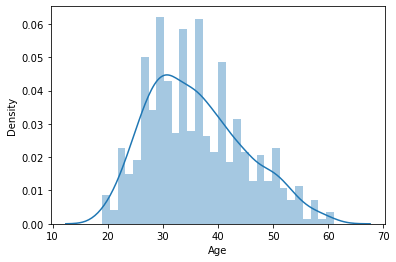

In [14]:
sns.distplot(df['Age'], bins = 30)

- Podemos observar que a maioria das pessoas está na faixa de idade entre 25 e 40 anos

### Criando um Jointplot "Area Income" vs "Age" para comparar a Média da renda do consumidor na região e a Idade do Consumidor

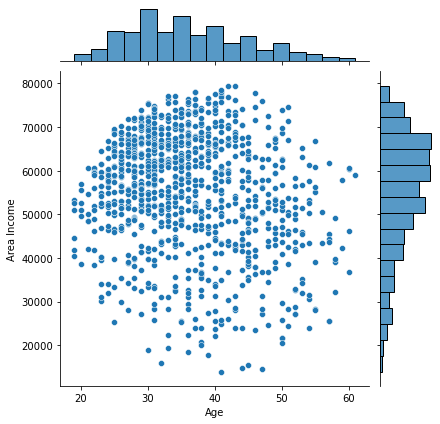

In [16]:
sns.jointplot('Age', 'Area Income', data=df)

### Observando a distribuição de tempo gasto no site por idade

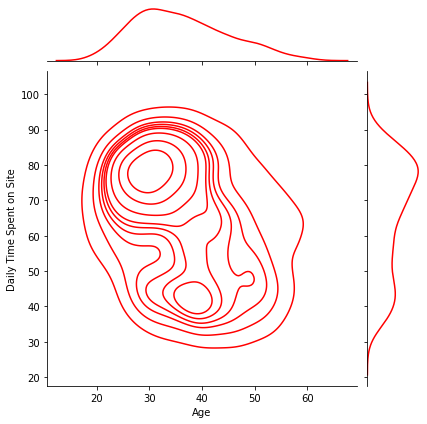

In [22]:
sns.jointplot(x = df['Age'], y = df['Daily Time Spent on Site'], kind = 'kde', color='red')

### Obeservando a distribuição entre "tempo gasto na internet por dia" em relação a "tempo médio gasto no site"


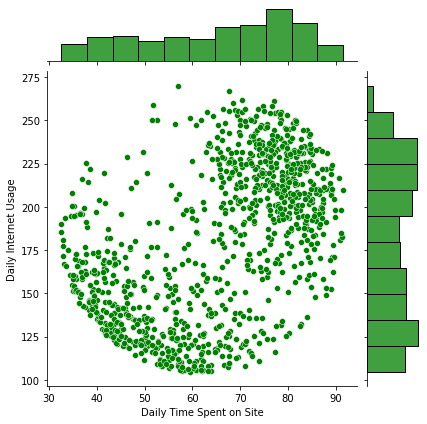

In [24]:
sns.jointplot(x = df['Daily Time Spent on Site'], y = df['Daily Internet Usage'], color='green')

### Visualizando todas as relações, e utilizando como parâmetro para a distribuição a coluna 'Clicked on Ad'

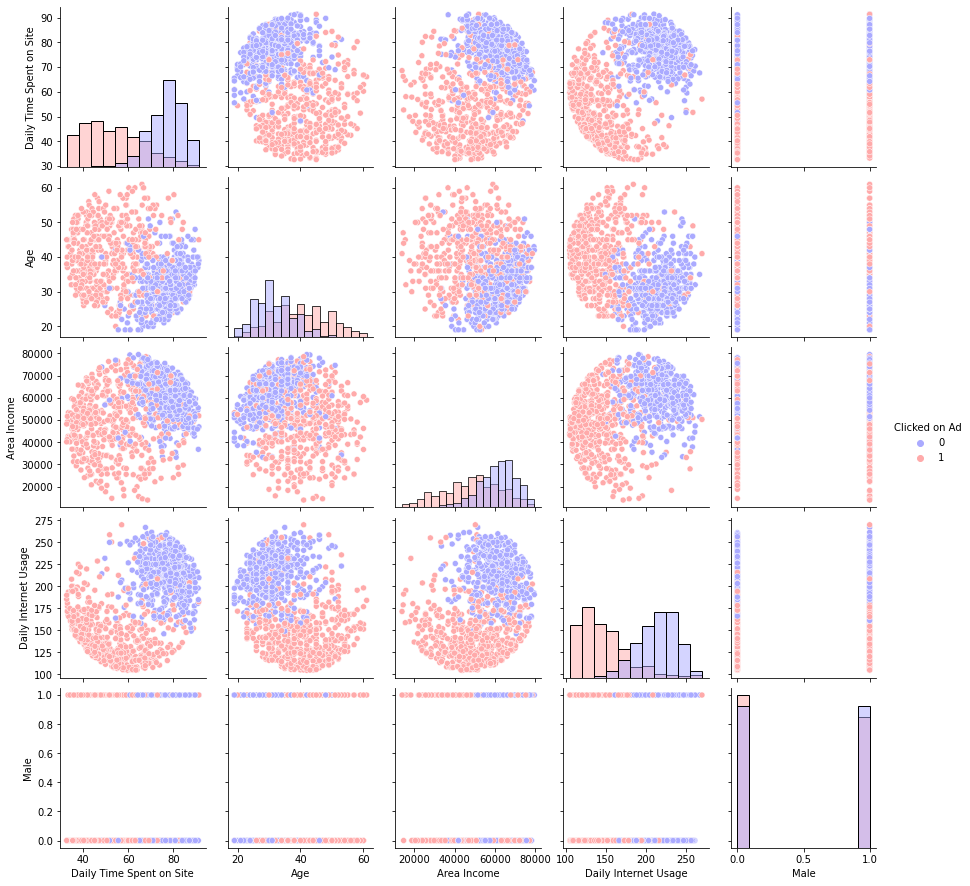

In [32]:
sns.pairplot(df, palette = 'bwr', hue='Clicked on Ad', diag_kind = 'hist')

### Construção do Modelo de Regressão Logistica
- Primeiro iremos dividir os dados em dados de treino e dados de teste

In [35]:
from sklearn.model_selection import train_test_split

### Dividindo os dados em treino e teste

In [36]:
X =   df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']]
y = df['Clicked on Ad']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

### Agora iremos treinar de fato o nosso modelo

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

### Previsões e avaliações do modelo

In [43]:
prediction = logmodel.predict(X_test)

### Visualizando 10 valores para ver as predições do Modelo

In [54]:
prediction[:10]

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

### Visualizando os Valores Reais que foram armazenados em y_test

In [49]:
y_test[:10]

521    1
737    1
740    1
660    1
411    0
678    0
626    0
513    1
859    0
136    1
Name: Clicked on Ad, dtype: int64

### Relatório de classificação do modelo

In [50]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89        89
           1       0.96      0.86      0.90       111

    accuracy                           0.90       200
   macro avg       0.90      0.91      0.90       200
weighted avg       0.91      0.90      0.90       200



In [53]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, prediction))

[[85  4]
 [16 95]]


- A partir do relatório obtido, a precisão e a recuperação são 0,91, o que mostra que os valores previstos são 91% precisos. Portanto, a probabilidade de o usuário clicar no comercial é de 0,91, o que é um valor de grande precisão para obter um bom modelo.

### Obtivemos um modelo que tem 91% de acertos em relação ás predições que fez!